In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [3]:
df = pd.read_csv('svo_tokenised.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,0,1,2,3,4,tokenized
0,0,0,2024-06-30 19:55:20,293,717488971,717488971,Прокуратура Центрального района г.Новокузнецка...,"['прокуратура', 'центральный', 'район', 'гново..."
1,1,1,2024-06-30 19:54:17,21094,41250601,41250601,Краткая версия репетиции Марша на Вашингтон у ...,"['краткий', 'версия', 'репетиция', 'марш', 'ва..."
2,2,2,2024-06-30 19:54:17,126271,16189980,16189980,КАКОВ КАДРОВЫЙ СОСТАВ ВЫСШЕЙ ГОСУДАРСТВЕННОЙ В...,"['каковой', 'кадровый', 'состав', 'высокий', '..."
3,3,3,2024-06-30 19:53:04,5172,94262922,94262922,Краткая версия репетиции Марша на Вашингтон у ...,"['краткий', 'версия', 'репетиция', 'марш', 'ва..."
4,4,4,2024-06-30 19:47:06,121438,588914966,588914966,Специальная военная операция. Обстановка на 30...,"['специальный', 'военный', 'операция', 'обстан..."


In [22]:
df.shape

(148279, 9)

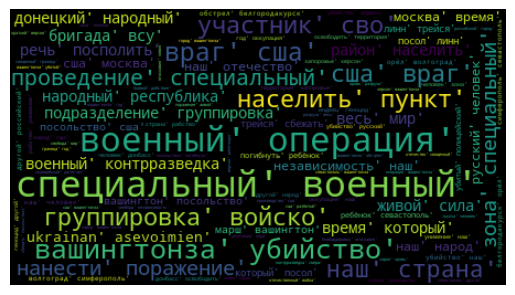

In [39]:
textt = ''.join(w for w in df.tokenized)
wordcloud = WordCloud(width=450,height=250).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('svo.jpg')
plt.show()

**Латантное распределение Дирихле (LDA)**

In [7]:
count_vect = CountVectorizer(max_df=0.8, min_df=3, stop_words=None)
doc_term_matrix = count_vect.fit_transform(df['tokenized'].values.astype('U'))
doc_term_matrix

<148279x4834 sparse matrix of type '<class 'numpy.int64'>'
	with 20199322 stored elements in Compressed Sparse Row format>

**2 темы**

In [9]:
LDA = LatentDirichletAllocation(n_components=2, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=2, random_state=42)

In [10]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['человек', 'страна', 'время', 'сво', 'сша', 'смерш', 'который', 'вашингтонза', 'год', 'наш']


Top 10 words for topic #1:
['гетман', 'сагайдачный', 'mm', 'год', 'бригада', 'группировка', 'всу', 'казак', 'ja', 'войско']




**3 темы**

In [42]:
LDA = LatentDirichletAllocation(n_components=3, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=3, random_state=42)

In [43]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['рф', 'государственный', 'фракция', 'стать', 'председатель', 'прохоров', 'андрей', 'совет', 'проект', 'экономический']


Top 10 words for topic #1:
['геннадий', 'стать', 'чеченский', 'кадыров', 'выборы', 'кпрф', 'россия', 'президент', 'га', 'зюганов']


Top 10 words for topic #2:
['сергей', 'правительство', 'владимир', 'председатель', 'государственный', 'федерация', 'россия', 'российский', 'президент', 'путин']




**4 темы**

In [44]:
LDA = LatentDirichletAllocation(n_components=4, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=4, random_state=42)

In [45]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['явлинский', 'труд', 'воробей', 'фракция', 'стать', 'прохоров', 'председатель', 'андрей', 'совет', 'экономический']


Top 10 words for topic #1:
['республика', 'геннадий', 'стать', 'чеченский', 'кадыров', 'кпрф', 'россия', 'президент', 'га', 'зюганов']


Top 10 words for topic #2:
['работа', 'федерация', 'владимир', 'сергей', 'правительство', 'председатель', 'российский', 'россия', 'президент', 'путин']


Top 10 words for topic #3:
['выборы', 'жириновский', 'почётный', 'проект', 'дума', 'владимир', 'президент', 'федерация', 'российский', 'государственный']




**Лучшая модель: 2 темы**

In [71]:
LDA = LatentDirichletAllocation(n_components=2, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=2, random_state=42)

In [72]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['санктпетербург', 'работа', 'государственный', 'правительство', 'владимир', 'председатель', 'российский', 'россия', 'президент', 'путин']


Top 10 words for topic #1:
['га', 'председатель', 'стать', 'сергей', 'государственный', 'федерация', 'россия', 'российский', 'президент', 'зюганов']




In [13]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(148279, 2)

In [14]:
df['Topic_LDA'] = topic_values.argmax(axis=1)
df.head()

,Unnamed: 0.1,Unnamed: 0,0,1,2,3,4,tokenized,Topic_LDA
0,0,0,2024-06-30 19:55:20,293,717488971,717488971,Прокуратура Центрального района г.Новокузнецка...,"['прокуратура', 'центральный', 'район', 'гново...",0
1,1,1,2024-06-30 19:54:17,21094,41250601,41250601,Краткая версия репетиции Марша на Вашингтон у ...,"['краткий', 'версия', 'репетиция', 'марш', 'ва...",0
2,2,2,2024-06-30 19:54:17,126271,16189980,16189980,КАКОВ КАДРОВЫЙ СОСТАВ ВЫСШЕЙ ГОСУДАРСТВЕННОЙ В...,"['каковой', 'кадровый', 'состав', 'высокий', '...",0
3,3,3,2024-06-30 19:53:04,5172,94262922,94262922,Краткая версия репетиции Марша на Вашингтон у ...,"['краткий', 'версия', 'репетиция', 'марш', 'ва...",0
4,4,4,2024-06-30 19:47:06,121438,588914966,588914966,Специальная военная операция. Обстановка на 30...,"['специальный', 'военный', 'операция', 'обстан...",1


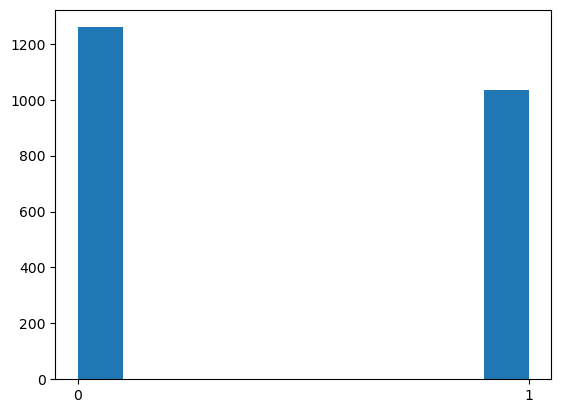

In [75]:
plt.hist(df['Topic_LDA'])
plt.xticks([0, 1]);

In [15]:
topic_1 = df[df['Topic_LDA']==0]
topic_1.shape

(96308, 9)

In [16]:
topic_2 = df[df['Topic_LDA']==1]
topic_2.shape

(51971, 9)

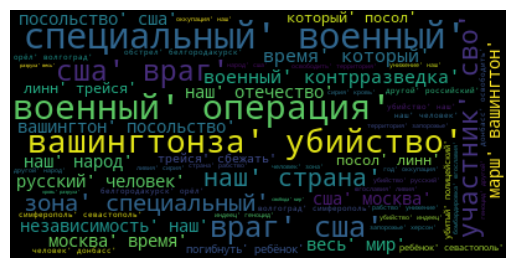

In [18]:
textt = ''.join(w for w in topic_1.tokenized)
wordcloud = WordCloud().generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

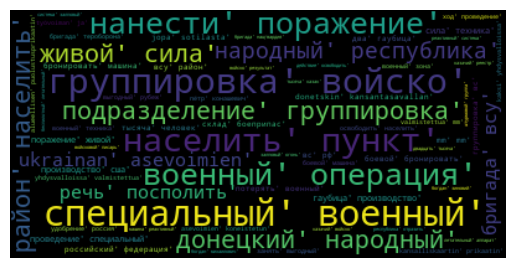

In [19]:
textt = ''.join(w for w in topic_2.tokenized)
wordcloud = WordCloud().generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Неотрицательная матричная факторизация (NMF)**

In [107]:
tfidf_vect = TfidfVectorizer(max_df=1.0, min_df=2, stop_words=None)
doc_term_matrix = tfidf_vect.fit_transform(df['tokens'].values.astype('U'))

**2 темы**

In [108]:
nmf = NMF(n_components=2, random_state=42)
nmf.fit(doc_term_matrix )

NMF(n_components=2, random_state=42)

In [109]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['партия', 'государственный', 'председатель', 'федерация', 'владимир', 'явлинский', 'россия', 'российский', 'президент', 'путин']


Top 10 words for topic #1:
['мочь', 'призывать', 'геннадий', 'андреевич', 'репост', 'кпрф', 'га', 'зюганов', 'поход', 'ставить']




**3 темы**

In [128]:
nmf = NMF(n_components=3, random_state=42)
nmf.fit(doc_term_matrix )

NMF(n_components=3, random_state=42)

In [129]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['проект', 'правительство', 'государственный', 'председатель', 'федерация', 'владимир', 'россия', 'российский', 'президент', 'путин']


Top 10 words for topic #1:
['мочь', 'призывать', 'геннадий', 'андреевич', 'репост', 'кпрф', 'га', 'зюганов', 'поход', 'ставить']


Top 10 words for topic #2:
['президент', 'выдвижение', 'состояться', 'свет', 'увидеть', 'яблоко', 'кандидат', 'григорий', 'партия', 'явлинский']




**3 темы: визуализация**

In [130]:
topic_values = nmf.transform(doc_term_matrix)
topic_values.shape

(2294, 3)

In [131]:
df['Topic_NMF'] = topic_values.argmax(axis=1)
df.head()

,Unnamed: 0.1,Unnamed: 0,post_id,post_text,tokenized,tokens,Topic_NMF
0,0,0,12103,"Итак 2024 наступил и скоро выборы, за кого гол...","['итак', 'наступить', 'скоро', 'выборы', 'кто'...","['итак', 'наступить', 'скоро', 'выборы', 'кто'...",0
1,1,1,12266,Последнего реального кандидата от оппозиции и ...,"['последний', 'реальный', 'кандидат', 'оппозиц...","['последний', 'реальный', 'кандидат', 'оппозиц...",2
2,2,2,12228,"Минутка на оппозицию...\n⚡«Неllо, Еlеnа Zelens...","['минутка', 'оппозиция', 'еlеn', 'байден', 'пo...","['минутка', 'оппозиция', 'еlеn', 'байден', 'пo...",0
3,3,3,12191,"Не допущен к выборам, по опросам у него не бол...","['допустить', 'выборы', 'опрос', 'последовател...","['допустить', 'выборы', 'опрос', 'последовател...",0
4,4,4,12183,Более не сможет быть кандидатом в Президенты -...,"['смочь', 'кандидат', 'президент', 'умереть', ...","['смочь', 'кандидат', 'президент', 'умереть', ...",2


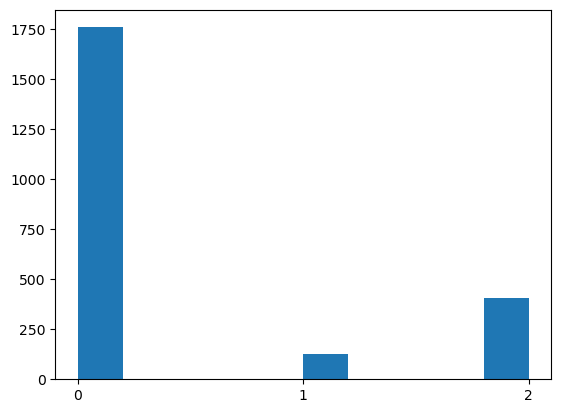

In [132]:
plt.hist(df['Topic_NMF'])
plt.xticks([0, 1, 2]);

In [133]:
topic_1 = df[df['Topic_NMF']==0]
topic_1.shape

(1760, 7)

In [134]:
topic_2 = df[df['Topic_NMF']==1]
topic_2.shape

(128, 7)

In [135]:
topic_3 = df[df['Topic_NMF']==2]
topic_3.shape

(406, 7)

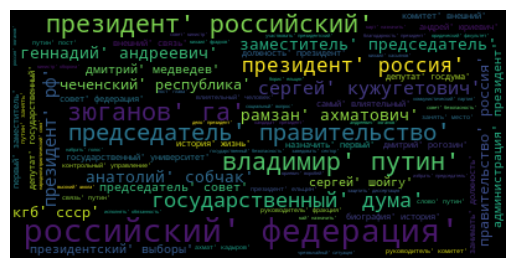

In [136]:
textt = ''.join(w for w in topic_1.tokens)
wordcloud = WordCloud().generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

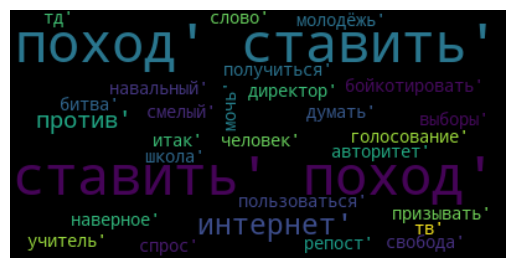

In [137]:
textt = ''.join(w for w in topic_2.tokens)
wordcloud = WordCloud().generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

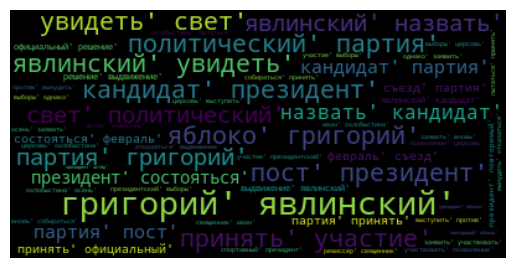

In [138]:
textt = ''.join(w for w in topic_3.tokens)
wordcloud = WordCloud().generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**2 темы: визуализация**

In [119]:
nmf = NMF(n_components=2, random_state=42)
nmf.fit(doc_term_matrix )

NMF(n_components=2, random_state=42)

In [120]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['партия', 'государственный', 'председатель', 'федерация', 'владимир', 'явлинский', 'россия', 'российский', 'президент', 'путин']


Top 10 words for topic #1:
['мочь', 'призывать', 'геннадий', 'андреевич', 'репост', 'кпрф', 'га', 'зюганов', 'поход', 'ставить']




In [121]:
topic_values = nmf.transform(doc_term_matrix)
topic_values.shape

(2294, 2)

In [122]:
df['Topic_NMF'] = topic_values.argmax(axis=1)
df.head()

,Unnamed: 0.1,Unnamed: 0,post_id,post_text,tokenized,tokens,Topic_NMF
0,0,0,12103,"Итак 2024 наступил и скоро выборы, за кого гол...","['итак', 'наступить', 'скоро', 'выборы', 'кто'...","['итак', 'наступить', 'скоро', 'выборы', 'кто'...",0
1,1,1,12266,Последнего реального кандидата от оппозиции и ...,"['последний', 'реальный', 'кандидат', 'оппозиц...","['последний', 'реальный', 'кандидат', 'оппозиц...",0
2,2,2,12228,"Минутка на оппозицию...\n⚡«Неllо, Еlеnа Zelens...","['минутка', 'оппозиция', 'еlеn', 'байден', 'пo...","['минутка', 'оппозиция', 'еlеn', 'байден', 'пo...",0
3,3,3,12191,"Не допущен к выборам, по опросам у него не бол...","['допустить', 'выборы', 'опрос', 'последовател...","['допустить', 'выборы', 'опрос', 'последовател...",0
4,4,4,12183,Более не сможет быть кандидатом в Президенты -...,"['смочь', 'кандидат', 'президент', 'умереть', ...","['смочь', 'кандидат', 'президент', 'умереть', ...",0


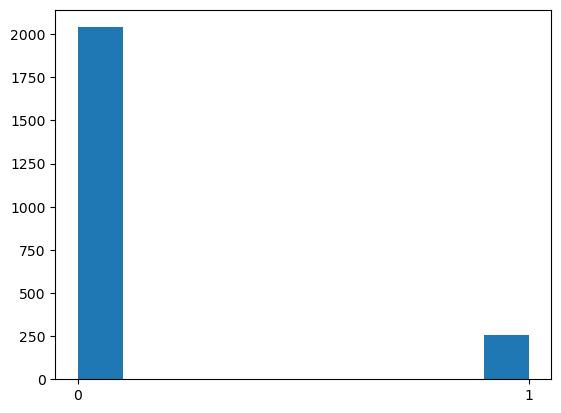

In [123]:
plt.hist(df['Topic_NMF'])
plt.xticks([0, 1]);

In [124]:
topic_1 = df[df['Topic_NMF']==0]
topic_1.shape

(2040, 7)

In [125]:
topic_2 = df[df['Topic_NMF']==1]
topic_2.shape

(254, 7)

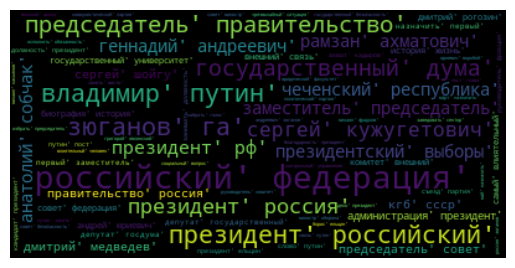

In [126]:
textt = ''.join(w for w in topic_1.tokens)
wordcloud = WordCloud().generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

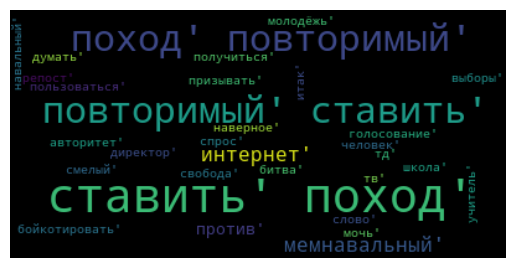

In [127]:
textt = ''.join(w for w in topic_2.tokens)
wordcloud = WordCloud().generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [141]:
topic_2

,Unnamed: 0.1,Unnamed: 0,post_id,post_text,tokenized,tokens,Topic_NMF
240,240,370,5332,"Навальный призывает бойкотировать выборы, а ка...","['навальный', 'призывать', 'бойкотировать', 'в...","['навальный', 'призывать', 'бойкотировать', 'в...",1
306,306,497,3385,Голосование 2018 тут https://vk.com/vybory_pre...,"['голосование', 'интернет', 'молодёжь', 'челов...","['голосование', 'интернет', 'молодёжь', 'челов...",1
331,331,532,3003,Надо ставить походу,"['ставить', 'поход']","['ставить', 'поход']",1
337,337,546,2925,Надо ставить походу,"['ставить', 'поход']","['ставить', 'поход']",1
368,368,584,2853,Надо ставить походу,"['ставить', 'поход']","['ставить', 'поход']",1
...,...,...,...,...,...,...,...
2144,2144,2702,188,Надо ставить походу,"['ставить', 'поход']","['ставить', 'поход']",1
2180,2180,2747,139,Надо ставить походу,"['ставить', 'поход']","['ставить', 'поход']",1
2215,2215,2789,97,Надо ставить походу,"['ставить', 'поход']","['ставить', 'поход']",1
2253,2253,2833,52,Надо ставить походу,"['ставить', 'поход']","['ставить', 'поход']",1


In [105]:
df.to_csv('posts_topic.csv')